# Prepare and preprocess dataset 

### In this notebook we learn prepare a dataset with basic operation with help of matplotlib,os,numpy and scipy,tensorflow libraries and preprocess the dataset and know about some kernels and convolution

In [41]:
import os
import matplotlib.pyplot as plt
import numpy as np
from scipy.misc import imresize
import tensorflow as tf

In [53]:
plt.style.use('ggplot')

create list of images of our celeba datset

In [2]:
files=os.listdir('/home/yogesh/datascience/datasets/img_align_celeba/')

we create a particular fiye list ilke .jpg

In [3]:
files = [file_i
         for file_i in os.listdir('/home/yogesh/datascience/datasets/img_align_celeba/')
         if file_i.endswith('.jpg')]

In [4]:
print(files[0])
print(files[1])

102791.jpg
139178.jpg


### Load the image

This isn't python, so won't work inside of any python script files. This only works inside notebook. What this is saying is that whenever we plot something using matplotlib, put the plots directly into the notebook, instead of using a window popup, which is the default behavior.

In [5]:
%matplotlib inline

We have a list of filenames, and we know where they are. But we need to combine the path to the file and the filename itself. If we try to use plt.imread fuction to show image.

In [6]:
plt.imread(os.path.join('/home/yogesh/datascience/datasets/img_align_celeba/', files[0]))

array([[[23, 10,  2],
        [24, 11,  3],
        [26, 13,  5],
        ..., 
        [35, 15,  4],
        [35, 22,  6],
        [35, 22,  6]],

       [[24, 11,  3],
        [25, 12,  4],
        [26, 13,  5],
        ..., 
        [35, 15,  4],
        [35, 22,  6],
        [35, 22,  6]],

       [[25, 12,  4],
        [25, 12,  4],
        [25, 12,  4],
        ..., 
        [34, 16,  4],
        [36, 23,  7],
        [36, 23,  7]],

       ..., 
       [[14, 14, 16],
        [14, 14, 16],
        [14, 14, 16],
        ..., 
        [42,  7,  3],
        [44, 11,  2],
        [44, 11,  2]],

       [[14, 14, 16],
        [14, 14, 16],
        [14, 14, 16],
        ..., 
        [45, 10,  6],
        [42,  9,  0],
        [42,  9,  0]],

       [[14, 14, 16],
        [14, 14, 16],
        [14, 14, 16],
        ..., 
        [45, 10,  6],
        [42,  9,  0],
        [42,  9,  0]]], dtype=uint8)

Now we get a bunch of numbers! I'd rather not have to keep prepending the path to my files, so I can create the list of files like so:


In [7]:
files = [os.path.join('/home/yogesh/datascience/datasets/img_align_celeba/', file_i)
 for file_i in os.listdir('/home/yogesh/datascience/datasets/img_align_celeba/')
 if '.jpg' in file_i]

#### RGB image representation

It turns out that all of these numbers are capable of describing an image. We can use the function imshow to see this:


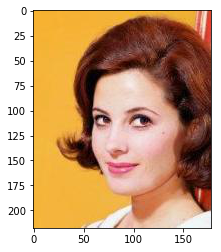

In [8]:
img = plt.imread(files[3])
plt.imshow(img)

In [9]:
img.shape##show the image matrix representation shape

(218, 178, 3)

This means that the image has 218 rows, 178 columns, and 3 color channels corresponding to the Red, Green, and Blue channels of the image, or RGB. Let's try looking at just one of the color channels. We can use the square brackets just like when we tried to access elements of our list:

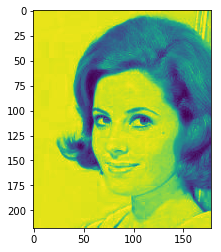

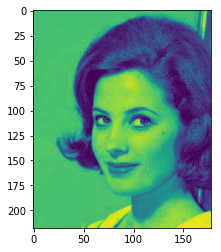

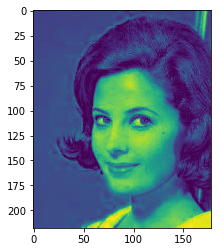

In [10]:
plt.figure()
plt.imshow(img[:, :, 0])
plt.figure()
plt.imshow(img[:, :, 1])
plt.figure()
plt.imshow(img[:, :, 2])

we use numpy to show a random image from our fies list

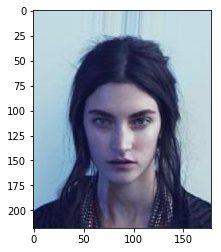

In [11]:
filename = files[np.random.randint(0, len(files))]
img = plt.imread(filename)
plt.imshow(img)

This might be something useful that we'd like to do often. So we can use a function to help us in the future:


In [12]:
def plot_image(filename):
    img = plt.imread(filename)
    plt.imshow(img)

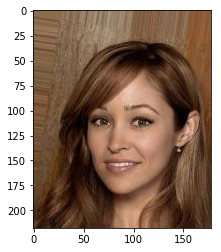

In [13]:
plot_image(files[np.random.randint(0, len(files))])##now simple to plot img

### Image Manipulation

#### Cropping images

In [14]:
def imcrop_tosquare(img):
    """Make any image a square image.

    Parameters
    ----------
    img : np.ndarray
        Input image to crop, assumed at least 2d.

    Returns
    -------
    crop : np.ndarray
        Cropped image.
    """
    if img.shape[0] > img.shape[1]:
        extra = (img.shape[0] - img.shape[1])
        if extra % 2 == 0:
            crop = img[extra // 2:-extra // 2, :]
        else:
            crop = img[max(0, extra // 2 + 1):min(-1, -(extra // 2)), :]
    elif img.shape[1] > img.shape[0]:
        extra = (img.shape[1] - img.shape[0])
        if extra % 2 == 0:
            crop = img[:, extra // 2:-extra // 2]
        else:
            crop = img[:, max(0, extra // 2 + 1):min(-1, -(extra // 2))]
    else:
        crop = img
    return crop

Let's try another crop function which can crop by an arbitrary amount. It will take an image and a single factor from 0-1, saying how much of the original image to crop:

In [15]:
def imcrop(img, amt):
    if amt <= 0 or amt >= 1:
        return img
    row_i = int(img.shape[0] * amt) // 2
    col_i = int(img.shape[1] * amt) // 2
    return img[row_i:-row_i, col_i:-col_i]

#### Resizing images

For resizing the image, we'll make use of a python library, scipy.misc.imresize function.

The imresize function takes a input image as its first parameter, and a tuple defining the new image shape as rows and then columns.
Let's see how our cropped image can be imresized now:

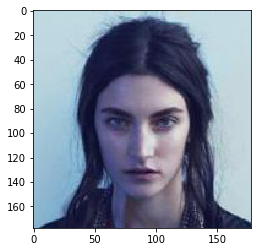

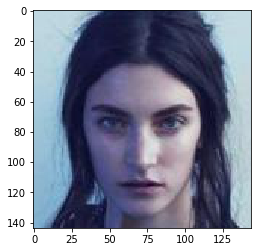

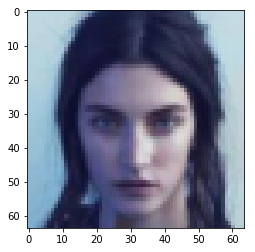

In [16]:
square = imcrop_tosquare(img)
plt.figure()
plt.imshow(square)
crop = imcrop(square, 0.2)
plt.figure()
plt.imshow(crop)
rsz = imresize(crop, (64, 64))
plt.figure()
plt.imshow(rsz)

Great! To really see what's going on, let's turn off the interpolation like so:

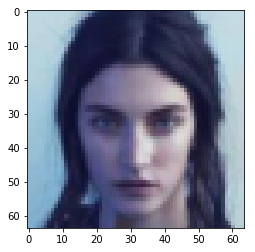

In [17]:
plt.imshow(rsz, interpolation='nearest')

(64, 64)


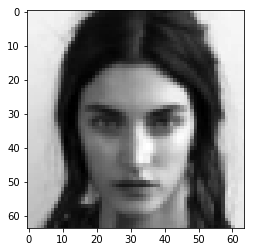

In [18]:
mean_img = np.mean(rsz, axis=2)##mean of rgb vallues for every pixel
print(mean_img.shape)
plt.imshow(mean_img, cmap='gray')

### Cropping/Resizing Images

We're going to loop over our files, crop the image to a square to remove the longer edge, and then crop again to remove some of the background, and then finally resize the image to a standard size of 64 x 64 pixels.

In [19]:
i=201# first 200 img of files
imgs = []
print()
for file_i in files:
    i=i-1
    if(i==0):
        break
    img = plt.imread(file_i)
    square = imcrop_tosquare(img)
    crop = imcrop(square, 0.2)
    rsz = imresize(crop, (64, 64))
    imgs.append(rsz)
print(len(imgs))


200


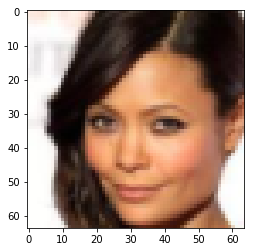

In [20]:
plt.imshow(imgs[100])

Since all of the images are the same size, we can make use of numpy's array instead of a list.


### The Batch Dimension

There is a convention for storing many images in an array using a new dimension called the batch dimension. The resulting image shape should be:

N x H x W x C

The Number of images, or the batch size, is first; then the Height or number of rows in the image; then the Width or number of cols in the image; then finally the number of channels the image has. A Color image should have 3 color channels, RGB. A Grayscale image should just have 1 channel.


We can combine all of our images to look like this in a few ways. The easiest way is to tell numpy to give us an array of all the images:

In [21]:
data = np.array(imgs)
data.shape

(200, 64, 64, 3)

We could also use the numpy.concatenate function, but we have to create a new dimension for each image. Numpy let's us do this by using a special variable np.newaxis

In [22]:
data = np.concatenate([img_i[np.newaxis] for img_i in imgs], axis=0)
data.shape

(200, 64, 64, 3)

The shape is describing batch, or number of images, the height, or rows of the image, the width, or columns of the image, and finally, the number of channels in the image, describing the red, green, and blue colors of the image.

# Preprocessing our dataset

### Mean/Deviation of Images

Now that we have our data in a single numpy variable, we can do alot of cool stuff. Let's look at the mean of the batch channel:


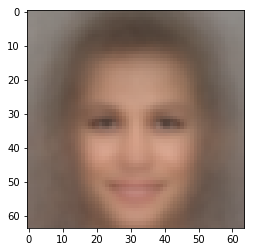

In [25]:
mean_img = np.mean(data, axis=0)
plt.imshow(mean_img.astype(np.uint8))

We've reduced down our entire dataset to a single representation which describes what most of our dataset looks like. There is one other very useful statistic which we can look at very easily:

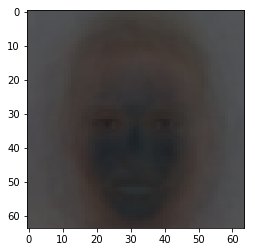

In [26]:
std_img = np.std(data, axis=0)
plt.imshow(std_img.astype(np.uint8))

So this is incredibly cool. We've just shown where changes are likely to be in our dataset of images. Or put another way, we're showing where and how much variance there is in our previous mean image representation.


We're looking at this per color channel. So we'll see variance for each color channel represented separately, and then combined as a color image. We can try to look at the average variance over all color channels by taking their mean:

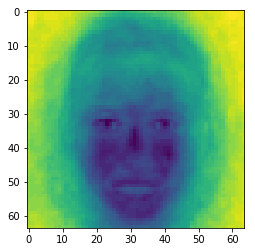

In [27]:
plt.imshow(np.mean(std_img, axis=2).astype(np.uint8))


This is showing us on average, how every color channel will vary as a heatmap. The more red, the more likely that our mean image is not the best representation. The more blue, the less likely that our mean image is far off from any other possible image.





If we are looking to use deep learning to learn something complex about our data, it will often start by modeling both the mean and standard deviation of our dataset. We can help speed things up by "preprocessing" our dataset by removing the mean and standard deviation

#### Histogram

We're first going to convert our batch x height x width x channels array into a 1 dimensional array.

In [28]:
flattened = data.ravel()
print(data[:1])
print(flattened[:10])

[[[[ 27  13   2]
   [ 28  14   3]
   [ 30  16   5]
   ..., 
   [121  87  52]
   [116  82  52]
   [ 89  57  31]]

  [[ 25  11   0]
   [ 28  14   3]
   [ 34  20   9]
   ..., 
   [117  82  43]
   [128  90  55]
   [121  85  54]]

  [[ 25  11   1]
   [ 25  11   1]
   [ 28  14   3]
   ..., 
   [118  82  42]
   [125  85  47]
   [139 101  64]]

  ..., 
  [[ 20  13   3]
   [ 31  20   9]
   [ 38  21   8]
   ..., 
   [107  43   8]
   [ 97  36   6]
   [102  43  12]]

  [[ 26  17  10]
   [ 34  22  12]
   [ 36  19   5]
   ..., 
   [106  43   6]
   [101  37   6]
   [ 99  38   7]]

  [[ 28  19   8]
   [ 34  22   8]
   [ 35  17   3]
   ..., 
   [106  44   7]
   [ 99  36   5]
   [ 94  34   4]]]]
[27 13  2 28 14  3 30 16  5 28]


We first convert our N x H x W x C dimensional array into a 1 dimensional array. The values of this array will be based on the last dimensions order.

We can visualize what the "distribution", or range and frequency of possible values are. This is a very useful thing to know. It tells us whether our data is predictable or not.

(array([ 10453.,  11693.,  12193.,  10691.,  10631.,  11164.,  11940.,
         12565.,  12199.,  11873.,  12074.,  11945.,  12618.,  12879.,
         12803.,  12969.,  12980.,  12544.,  12424.,  12072.,  11952.,
         11980.,  12096.,  12171.,  12420.,  12199.,  12140.,  12074.,
         11940.,  11995.,  12450.,  11913.,  11887.,  12057.,  11650.,
         11852.,  11751.,  11781.,  11539.,  11795.,  11415.,  11331.,
         11189.,  11177.,  11244.,  11333.,  11120.,  10972.,  11002.,
         10823.,  10789.,  10722.,  10244.,  10345.,  10242.,  10260.,
         10101.,   9981.,  10131.,  10237.,  10210.,  10162.,  10137.,
         10040.,   9994.,  10120.,   9859.,  10047.,   9784.,   9800.,
         10081.,   9940.,  10030.,  10215.,  10190.,  10250.,  10020.,
         10254.,   9927.,  10217.,  10332.,  10318.,  10351.,  10367.,
         10446.,  10596.,  10517.,  10410.,  10219.,  10377.,  10386.,
         10427.,  10264.,  10360.,  10212.,  10421.,  10696.,  10804.,
      

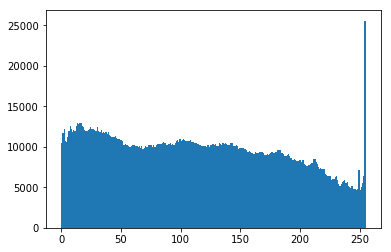

In [29]:
plt.hist(flattened.ravel(), 255)


The last line is saying give me a histogram of every value in the vector, and use 255 bins. Each bin is grouping a range of values. The bars of each bin describe the frequency, or how many times anything within that range of values appears.In other words, it is telling us if there is something that seems to happen more than anything else. If there is, it is likely that a neural network will take advantage of that.

#### Histogram Equalization

The mean of our dataset looks like this:

(array([   1.,    1.,    1.,    3.,    3.,    3.,    8.,   14.,   13.,
          16.,   15.,   17.,   11.,   17.,    6.,   16.,   11.,   14.,
          15.,   10.,   14.,   21.,   30.,   25.,   35.,   29.,   29.,
          43.,   44.,   42.,   46.,   62.,   57.,   55.,   55.,   54.,
          60.,   64.,   53.,   60.,   84.,   59.,   80.,   66.,   81.,
          71.,   93.,   87.,   91.,  104.,   95.,   94.,  100.,  113.,
         115.,   90.,  103.,   96.,  101.,   97.,  118.,  127.,  118.,
          85.,  102.,   92.,  112.,   96.,  106.,  108.,  113.,  104.,
          96.,  100.,  109.,  114.,  125.,  125.,   96.,  109.,  107.,
         130.,  109.,  101.,  126.,  127.,  119.,  108.,  139.,  105.,
         130.,  110.,  127.,  113.,  109.,  111.,   85.,  104.,   94.,
          97.,  109.,  116.,  119.,  119.,  122.,  116.,  109.,   97.,
         115.,   96.,  102.,   97.,  102.,  107.,   97.,  116.,   86.,
          97.,   76.,   80.,   75.,   89.,   79.,   69.,   66.,   83.,
      

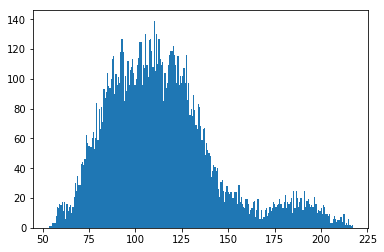

In [32]:
plt.hist(mean_img.ravel(), 255)

When we subtract an image by our mean image, we remove all of this information from it. And that means that the rest of the information is really what is important for describing what is unique about it.
Let's try and compare the histogram before and after "normalizing our data":

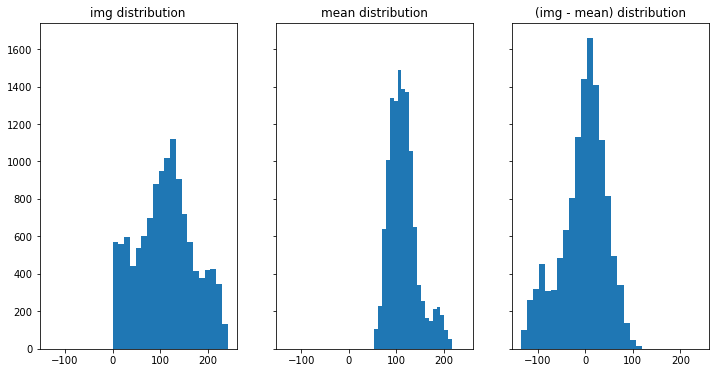

In [33]:
bins = 20
fig, axs = plt.subplots(1, 3, figsize=(12, 6), sharey=True, sharex=True)
axs[0].hist((data[0]).ravel(), bins)
axs[0].set_title('img distribution')
axs[1].hist((mean_img).ravel(), bins)
axs[1].set_title('mean distribution')
axs[2].hist((data[0] - mean_img).ravel(), bins)
axs[2].set_title('(img - mean) distribution')

What we can see from the histograms is the original image's distribution of values from 0 - 255. The mean image's data distribution is mostly centered around the value 100. When we look at the difference of the original image and the mean image as a histogram, we can see that the distribution is now centered around 0. What we are seeing is the distribution of values that were above the mean image's intensity, and which were below it. Let's take it one step further and complete the normalization by dividing by the standard deviation of our dataset:

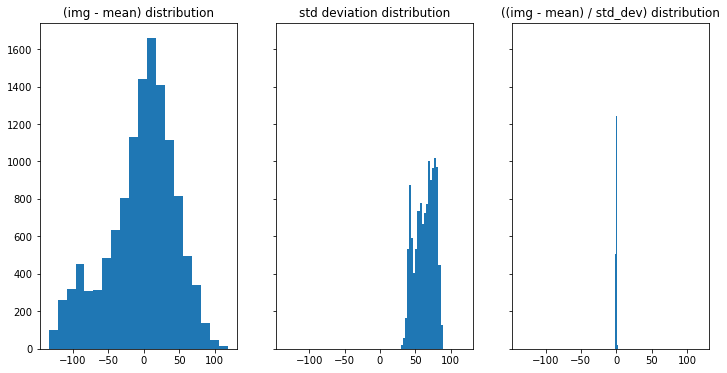

In [37]:
fig, axs = plt.subplots(1, 3, figsize=(12, 6), sharey=True, sharex=True)
axs[0].hist((data[0] - mean_img).ravel(), bins)
axs[0].set_title('(img - mean) distribution')
axs[1].hist((std_img).ravel(), bins)
axs[1].set_title('std deviation distribution')
axs[2].hist(((data[0] - mean_img) / std_img).ravel(), bins)
axs[2].set_title('((img - mean) / std_dev) distribution')

Now our data has been squished into a peak! We'll have to look at it on a different scale to see what's going on:


(array([  1.93000000e+02,   5.04000000e+02,   5.11000000e+02,
          4.84000000e+02,   4.83000000e+02,   6.33000000e+02,
          7.59000000e+02,   8.76000000e+02,   1.00300000e+03,
          1.20100000e+03,   1.24300000e+03,   1.18400000e+03,
          1.16600000e+03,   8.97000000e+02,   6.02000000e+02,
          3.73000000e+02,   1.10000000e+02,   4.70000000e+01,
          1.80000000e+01,   1.00000000e+00]),
 array([-1.58745975, -1.41476445, -1.24206916, -1.06937386, -0.89667857,
        -0.72398328, -0.55128798, -0.37859269, -0.20589739, -0.0332021 ,
         0.1394932 ,  0.31218849,  0.48488379,  0.65757908,  0.83027438,
         1.00296967,  1.17566497,  1.34836026,  1.52105556,  1.69375085,
         1.86644615]),
 <a list of 20 Patch objects>)

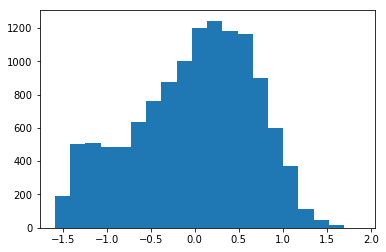

In [39]:
plt.hist(((data[0] - mean_img) / std_img).ravel(), bins)

What we can see is that the data is in the range of -2 to 2, with the bulk of the data centered around -1 to 1. This is the effect of normalizing our data: most of the data will be around 0, where some deviations of it will follow between -2 to 2.

### Tensorflow Basic

In [42]:
x = tf.linspace(-3.0, 3.0, 100)
print(x)

Tensor("LinSpace:0", shape=(100,), dtype=float32)


In [44]:
g=tf.get_default_graph()

In [45]:
sess = tf.InteractiveSession()
x.eval()

array([-3.        , -2.939394  , -2.87878799, -2.81818175, -2.75757575,
       -2.69696975, -2.63636351, -2.5757575 , -2.5151515 , -2.4545455 ,
       -2.3939395 , -2.33333325, -2.27272725, -2.21212125, -2.15151501,
       -2.090909  , -2.030303  , -1.969697  , -1.90909088, -1.84848475,
       -1.78787875, -1.72727275, -1.66666663, -1.6060605 , -1.5454545 ,
       -1.4848485 , -1.42424238, -1.36363626, -1.30303025, -1.24242425,
       -1.18181813, -1.12121201, -1.060606  , -1.        , -0.939394  ,
       -0.87878776, -0.81818175, -0.75757575, -0.69696951, -0.63636351,
       -0.5757575 , -0.5151515 , -0.4545455 , -0.39393926, -0.33333325,
       -0.27272725, -0.21212101, -0.15151501, -0.090909  , -0.030303  ,
        0.030303  ,  0.09090924,  0.15151525,  0.21212125,  0.27272749,
        0.33333349,  0.3939395 ,  0.4545455 ,  0.5151515 ,  0.57575774,
        0.63636374,  0.69696975,  0.75757599,  0.81818199,  0.87878799,
        0.939394  ,  1.        ,  1.060606  ,  1.12121201,  1.18

Lets try a set of operations now. We'll try to create a Gaussian curve. This should resemble a normalized histogram where most of the data is centered around the mean of 0. It's also sometimes refered to by the bell curve or normal curve.

In [46]:
mean = 0.0
sigma = 1.0


z = (tf.exp(tf.negative(tf.pow(x - mean, 2.0) /
                   (2.0 * tf.pow(sigma, 2.0)))) *
     (1.0 / (sigma * tf.sqrt(2.0 * 3.1415))))

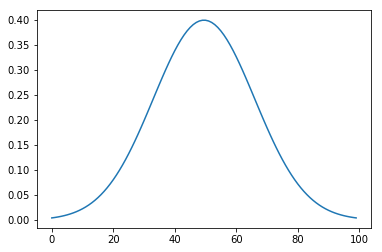

In [47]:
res = z.eval()
plt.plot(res)

## Convolution

### Creating a 2-D Gaussian Kernel

Let's try creating a 2-dimensional Gaussian. This can be done by multiplying a vector by its transpose.

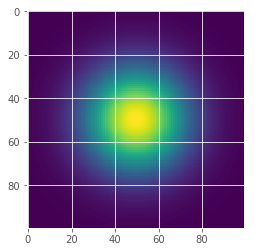

In [54]:
# Let's store the number of values in our Gaussian curve.
ksize = z.get_shape().as_list()[0]

# Let's multiply the two to get a 2d gaussian
z_2d = tf.matmul(tf.reshape(z, [ksize, 1]), tf.reshape(z, [1, ksize]))

# Execute the graph
plt.imshow(z_2d.eval())

### Convolving an Image with a Gaussian

A very common operation that we'll come across with Deep Learning is convolution. We're going to explore what this means using our new gaussian kernel that we've just created. For now, just think of it as a way of filtering information. We're going to effectively filter our image using this Gaussian function, as if the gaussian function is the lens through which we'll see our image data. What it will do is at every location we tell it to filter, it will average the image values around it based on what the kernel's values are. The Gaussian's kernel is basically saying, take a lot the center, a then decesasingly less as you go farther away from the center. The effect of convolving the image with this type of kernel is that the entire image will be blurred.

(512, 512)


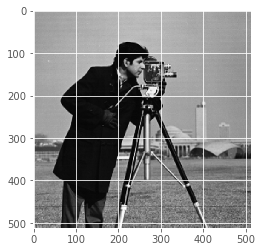

In [55]:
from skimage import data
img = data.camera().astype(np.float32)
plt.imshow(img, cmap='gray')
print(img.shape)

Notice our img shape is 2-dimensional. For image convolution in Tensorflow, we need our images to be 4 dimensional. Remember that when we load many iamges and combine them in a single numpy array, the resulting shape has the number of images first.

N x H x W x C

In order to perform 2d convolution with tensorflow, we'll need the same dimensions for our image. With just 1 grayscale image, this means the shape will be:

1 x H x W x 1

In [56]:
# We could use the numpy reshape function to reshape our numpy array
img_4d = img.reshape([1, img.shape[0], img.shape[1], 1])
print(img_4d.shape)

# but since we'll be using tensorflow, we can use the tensorflow reshape function:
img_4d = tf.reshape(img, [1, img.shape[0], img.shape[1], 1])
print(img_4d)

(1, 512, 512, 1)
Tensor("Reshape_10:0", shape=(1, 512, 512, 1), dtype=float32)


We'll also have to reshape our Gaussian Kernel to be 4-dimensional as well. The dimensions for kernels are slightly different! Remember that the image is:

Number of Images x Image Height x Image Width x Number of Channels

we have:

Kernel Height x Kernel Width x Number of Input Channels x Number of Output Channels

In [57]:
# Reshape the 2d kernel to tensorflow's required 4d format: H x W x I x O
z_4d = tf.reshape(z_2d, [ksize, ksize, 1, 1])
print(z_4d.get_shape().as_list())

[100, 100, 1, 1]


### Convolve/Filter an image using a Gaussian Kernel

In [58]:
convolved = tf.nn.conv2d(img_4d, z_4d, strides=[1, 1, 1, 1], padding='SAME')
res = convolved.eval()
print(res.shape)

(1, 512, 512, 1)


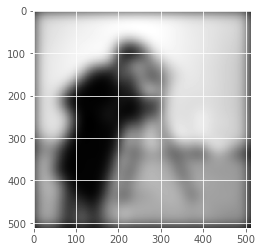

In [60]:
# Matplotlib cannot handle plotting 4D images!  We'll have to convert this back to the original shape.
#There are a few ways we could do this.  We could plot by "squeezing" the singleton dimensions.
plt.imshow(np.squeeze(res), cmap='gray')

## Modulating the Gaussian with a Sine Wave to create Gabor KernelÂ¶

Let's create another interesting convolution kernel called a Gabor. This is a lot like the Gaussian kernel, except we use a sine wave to modulate that.
We first use linspace to get a set of values the same range as our gaussian, which should be from -3 standard deviations to +3 standard deviations.

In [61]:
xs = tf.linspace(-3.0, 3.0, ksize)

We then calculate the sine of these values

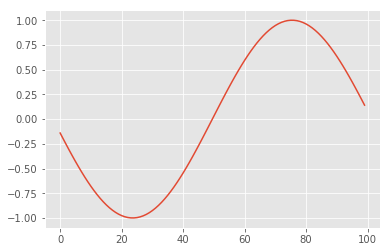

In [62]:
ys = tf.sin(xs)
plt.figure()
plt.plot(ys.eval())

And for multiplication, we'll need to convert this 1-dimensional vector to a matrix: N x 1

We then repeat this wave across the matrix by using a multiplication of ones:

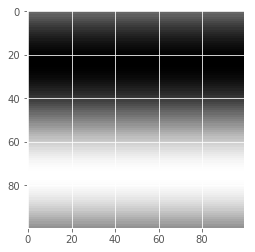

In [63]:
ys = tf.reshape(ys, [ksize, 1])
ones = tf.ones((1, ksize))
wave = tf.matmul(ys, ones)
plt.imshow(wave.eval(), cmap='gray')

We can directly multiply our old Gaussian kernel by this wave and get a gabor kernel:

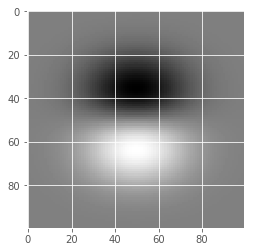

In [64]:
gabor = tf.multiply(wave, z_2d)
plt.imshow(gabor.eval(), cmap='gray')

### Manipulating an image with this Gabor

Let's rewrite our convolution operation using a placeholder for the image and the kernel and then see how the same operation could have been done. We're going to set the image dimensions to None x None.

In [66]:
# This is a placeholder which will become part of the tensorflow graph, but
# which we have to later explicitly define whenever we run/evaluate the graph.
# Pretty much everything you do in tensorflow can have a name.  If we don't
# specify the name, tensorflow will give a default one, like "Placeholder_0".
# Let's use a more useful name to help us understand what's happening.
img = tf.placeholder(tf.float32, shape=[None, None], name='img')


# We'll reshape the 2d image to a 3-d tensor just like before:
# Except now we'll make use of another tensorflow function, expand dims, which adds a singleton dimension at the axis we specify.
# We use it to reshape our H x W image to include a channel dimension of 1
# our new dimensions will end up being: H x W x 1
img_3d = tf.expand_dims(img, 2)
dims = img_3d.get_shape()
print(dims)

# And again to get: 1 x H x W x 1
img_4d = tf.expand_dims(img_3d, 0)
print(img_4d.get_shape().as_list())

# Let's create another set of placeholders for our Gabor's parameters:
mean = tf.placeholder(tf.float32, name='mean')
sigma = tf.placeholder(tf.float32, name='sigma')
ksize = tf.placeholder(tf.int32, name='ksize')

# Then finally redo the entire set of operations we've done to convolve our
# image, except with our placeholders
x = tf.linspace(-3.0, 3.0, ksize)
z = (tf.exp(tf.negative(tf.pow(x - mean, 2.0) /
                   (2.0 * tf.pow(sigma, 2.0)))) *
      (1.0 / (sigma * tf.sqrt(2.0 * 3.1415))))
z_2d = tf.matmul(
  tf.reshape(z, tf.stack([ksize, 1])),
  tf.reshape(z, tf.stack([1, ksize])))
ys = tf.sin(x)
ys = tf.reshape(ys, tf.stack([ksize, 1]))
ones = tf.ones(tf.stack([1, ksize]))
wave = tf.matmul(ys, ones)
gabor = tf.multiply(wave, z_2d)
gabor_4d = tf.reshape(gabor, tf.stack([ksize, ksize, 1, 1]))

# And finally, convolve the two:
convolved = tf.nn.conv2d(img_4d, gabor_4d, strides=[1, 1, 1, 1], padding='SAME', name='convolved')
convolved_img = convolved[0, :, :, 0]

(?, ?, 1)
[1, None, None, 1]


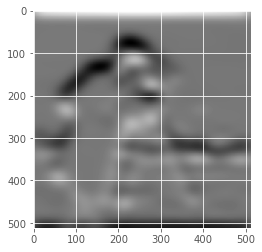

In [67]:
res = convolved_img.eval(feed_dict={
    img: data.camera(), mean:0.0, sigma:1.0, ksize:100})
plt.imshow(res, cmap='gray')

Now, instead of having to rewrite the entire graph, we can just specify the different placeholders.

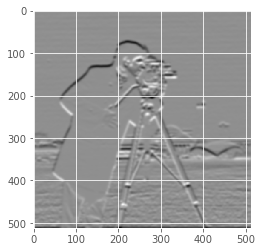

In [68]:
res = convolved_img.eval(feed_dict={
    img: data.camera(),
    mean: 0.0,
    sigma: 0.5,
    ksize: 32
  })
plt.imshow(res, cmap='gray')

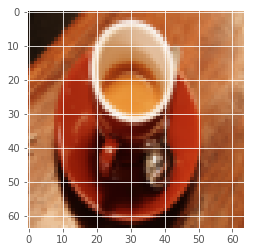

In [73]:
from skimage.data import coffee
from scipy.misc import imresize
img = imresize(coffee(), (64, 64))
plt.imshow(img)

## Create A deepnet to paint the image